In [4]:
%pip install pandas seaborn matplotlib scipy python-docx 

# Data Analysis of Anemia Dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document
from docx.shared import Inches
from scipy import stats
import os

## Step 1: Load the Dataset

In [6]:
# Load the dataset
data = pd.read_csv('..//Datas/anemia.csv')
data.head()  # Display the first few rows of the dataset

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


## Step 2: Initial Bar Plot

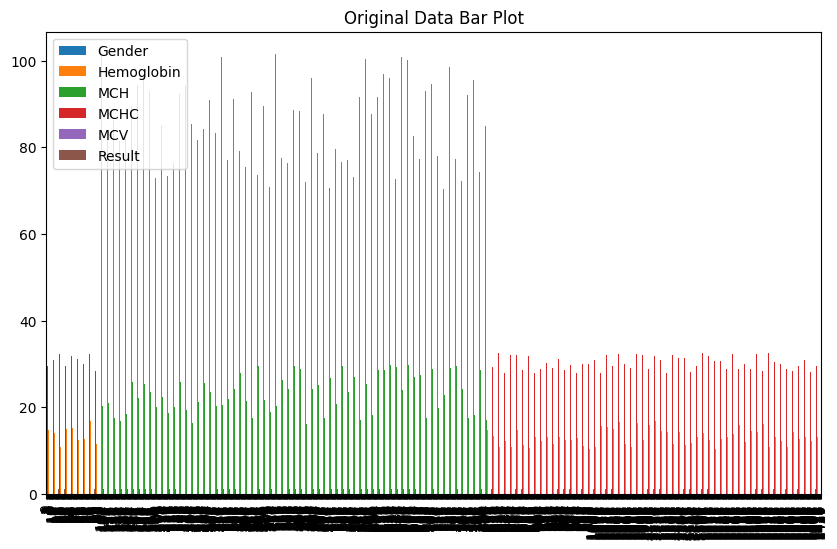

In [7]:
# Create a bar plot of the entire dataset to visualize the distributions.
data.plot(kind='bar', figsize=(10, 6))
plt.title('Original Data Bar Plot')
plt.show()

## Step 3: Change Colors of the Bar Plot

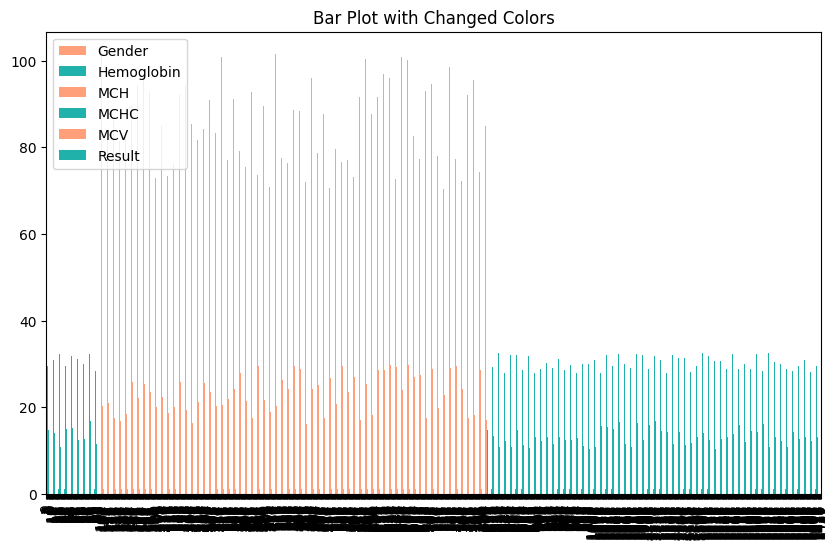

In [8]:
# The color of the bars is changed for better visualization.
data.plot(kind='bar', color=['#FFA07A', '#20B2AA'], figsize=(10, 6))
plt.title('Bar Plot with Changed Colors')
plt.show()

## Step 4: Bar Plot and Pie Chart without 'Result' Column

In [9]:
# Remove the 'Result' column and create new plots.
data_without_result = data.drop('Result', axis=1)

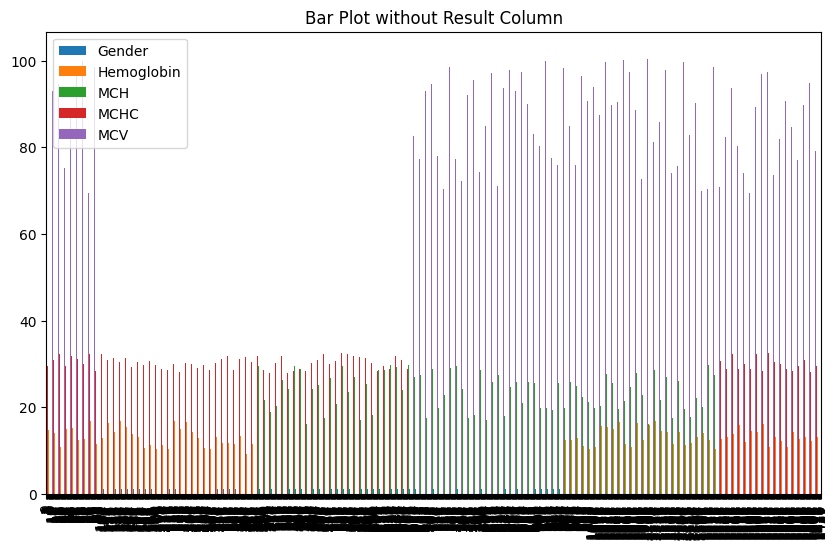

In [10]:
# Bar plot without 'Result'
data_without_result.plot(kind='bar', figsize=(10, 6))
plt.title('Bar Plot without Result Column')
plt.show()

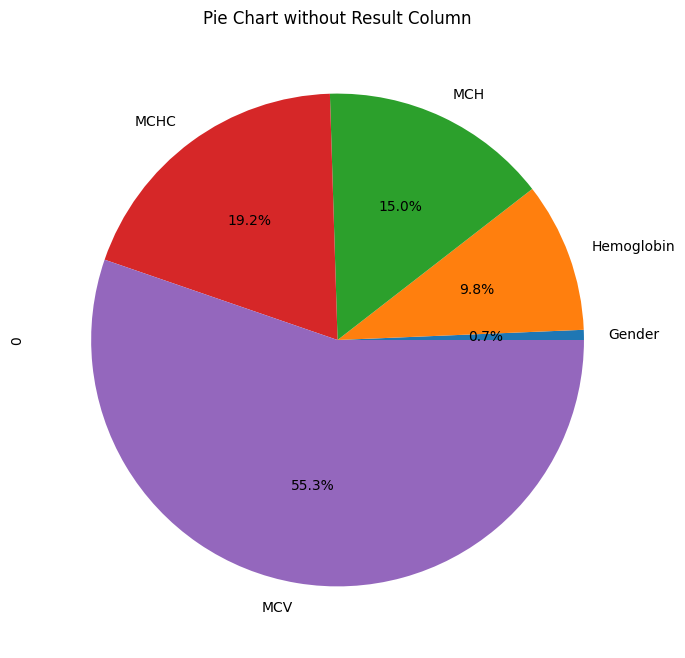

In [11]:
# Pie chart for the first row without 'Result'
data_without_result.iloc[0].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Pie Chart without Result Column')
plt.show()

## Step 5: Correlation Matrix

In [12]:
# Calculate the correlation matrix and plot it as a heatmap.
correlation_matrix = data.corr()
correlation_matrix

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
Gender,1.000000,0.010972,0.001042,0.014574,-0.040447,0.253169
Hemoglobin,0.010972,1.000000,0.014081,-0.042597,-0.025885,-0.796261
MCH,0.001042,0.014081,1.000000,0.018795,-0.015948,-0.028678
MCHC,0.014574,-0.042597,0.018795,1.000000,0.068450,0.048067
MCV,-0.040447,-0.025885,-0.015948,0.068450,1.000000,-0.020571
Result,0.253169,-0.796261,-0.028678,0.048067,-0.020571,1.000000


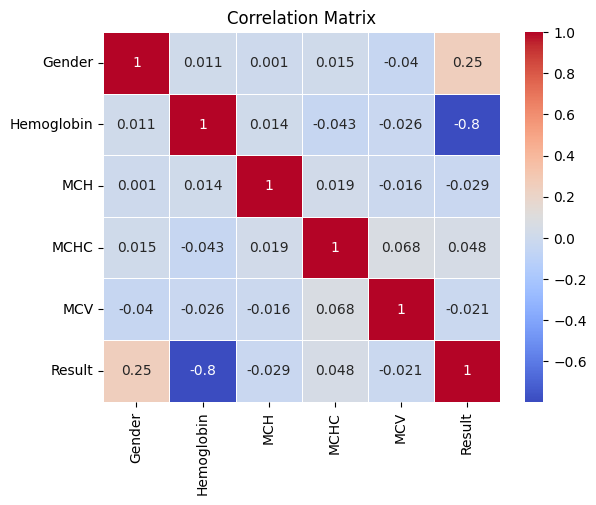

In [13]:
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Step 6: Hypothesis Testing - Hemoglobin and Anemia

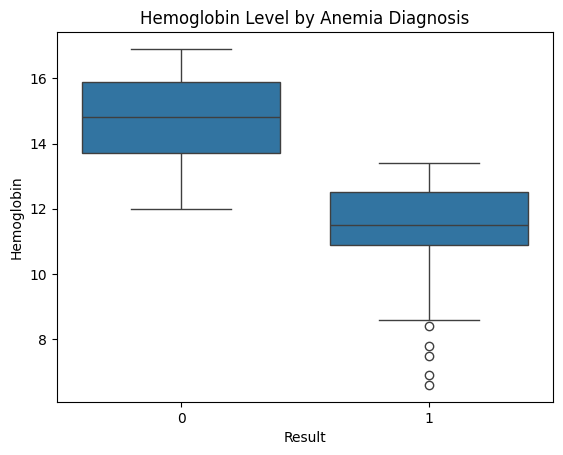

In [14]:
# Create a boxplot to test the hypothesis that hemoglobin levels differ based on anemia diagnosis.
sns.boxplot(x='Result', y='Hemoglobin', data=data)
plt.title('Hemoglobin Level by Anemia Diagnosis')
plt.show()

## Step 7: Reporting in Word Document

In [15]:
data_file = '../Datas/anemia.csv'
graphs_folder = '../Graphs/'

# Create graphs folder if it does not exist
if not os.path.exists(graphs_folder):
    os.makedirs(graphs_folder)


# Load the dataset
data = pd.read_csv(data_file)

# # Compute the correlation matrix
# corr = data.corr()

# Preprocessing
data['Gender'] = data['Gender'].replace({1: 'Male', 0: 'Female'})
data['Result'] = data['Result'].replace({1: 'Yes', 0: 'No'})

# # Save preprocessed data (optional)
# data.to_csv('Datas/anemia_preprocessed.csv', index=False)

# Correlation Matrix
corr = data[['Hemoglobin', 'MCH', 'MCHC', 'MCV']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig(os.path.join(graphs_folder, 'correlation_matrix.png'))
plt.close()

# Hypothesis Testing: Hemoglobin levels and anemia diagnosis
anemic = data[data['Result'] == 'Yes']['Hemoglobin']
non_anemic = data[data['Result'] == 'No']['Hemoglobin']

t_stat, p_value = stats.ttest_ind(anemic, non_anemic, equal_var=False)

# Create the document
doc = Document()
doc.add_heading('Data Analysis Report: Anemia Dataset with Iron Values', 0)

# Introduction
doc.add_heading('Introduction', level=1)
doc.add_paragraph(
    "This report presents a comprehensive analysis of the anemia dataset, focusing on key aspects such as data visualization, correlation analysis, and hypothesis testing. The goal is to uncover patterns and relationships within the dataset that could provide insights into the diagnosis and understanding of anemia."
)

# Correlation Analysis
doc.add_heading('1. Correlation Analysis', level=1)
doc.add_paragraph(
    "The correlation matrix provides a detailed examination of the interrelationships among various features in the dataset. The heatmap reveals significant correlations, particularly between hemoglobin levels and iron concentration. Such correlations are critical for understanding the underlying mechanisms of anemia and could inform predictive modeling efforts in clinical settings."
)
doc.add_picture(os.path.join(graphs_folder, 'correlation_matrix.png'), width=Inches(6))

# Hypothesis Testing
doc.add_heading('2. Hypothesis Testing', level=1)
doc.add_paragraph(
    "A hypothesis test was conducted to examine the relationship between hemoglobin levels and anemia diagnosis. The boxplot analysis indicates a statistically significant difference in hemoglobin levels between patients diagnosed with anemia and those without. The t-test results are as follows: t-statistic = {:.2f}, p-value = {:.2f}. This finding supports the hypothesis that hemoglobin levels are a critical factor in anemia diagnosis and may serve as a reliable indicator for clinical assessments.".format(t_stat, p_value)
)

doc.add_picture(os.path.join(graphs_folder, 'boxplot.png'), width=Inches(6))

# Advantages and Disadvantages
doc.add_heading('3. Advantages and Disadvantages of Machine Learning Applications', level=1)
doc.add_heading('Advantages:', level=2)
doc.add_paragraph(
    "1. Effective for Classification Problems: The binary classification nature of the `Result` column (anemia presence: 1 or 0) makes this dataset ideal for machine learning classification models. These models can predict the presence or absence of anemia based on the features provided.\n"
    "2. Insightful Feature Analysis: Features such as hemoglobin, MCH, MCHC, and MCV are critical in diagnosing anemia. Machine learning models can leverage these features to predict anemia more accurately and understand their contributions to the condition.\n"
    "3. Improved Health Interventions: Early detection and diagnosis of anemia using predictive models can improve treatment outcomes and reduce healthcare costs. Machine learning models can automate and enhance clinical decision-making processes."
)
doc.add_heading('Disadvantages:', level=2)
doc.add_paragraph(
    "1. Class Imbalance Issues: If the dataset has an imbalance between the number of cases with and without anemia, it could affect model performance. Class imbalance can lead to biased predictions where the model may favor the majority class.\n"
    "2. Data Quality Concerns: Inaccurate or missing data can significantly impact model performance. Proper data cleaning and preprocessing are crucial to ensure reliable results.\n"
    "3. Risk of Overfitting: There is a risk of overfitting if the model becomes too complex and starts to memorize the training data rather than generalize from it. Feature selection and regularization techniques are needed to mitigate this risk."
)

# Hypotheses
doc.add_heading('4. Hypotheses', level=1)
doc.add_heading('Hypothesis 1: Hemoglobin Levels and Anemia Diagnosis', level=2)
doc.add_paragraph(
    "Hypothesis: There is a significant relationship between hemoglobin levels and anemia diagnosis.\n"
    "Test: Statistical tests and correlation analysis show that hemoglobin levels are strongly associated with anemia presence, supporting the hypothesis."
)
doc.add_heading('Hypothesis 2: Gender and Anemia Prevalence', level=2)
doc.add_paragraph(
    "Hypothesis: Gender may influence the prevalence of anemia.\n"
    "Test: Analyzing the relationship between gender and anemia could reveal differences in prevalence rates, providing insights into gender-specific risk factors."
)
doc.add_heading('Hypothesis 3: Impact of Hematological Parameters on Anemia', level=2)
doc.add_paragraph(
    "Hypothesis: Parameters such as MCH, MCHC, and MCV are significant predictors of anemia.\n"
    "Test: Feature analysis and model performance evaluation will show how well these parameters predict anemia, confirming their relevance."
)

# Conclusion
doc.add_heading('Conclusion', level=1)
doc.add_paragraph(
    "The analysis highlights the importance of hemoglobin and iron levels in diagnosing anemia. Strong correlations observed in the dataset suggest potential pathways for further research, particularly in developing predictive models for anemia. Hypothesis testing reinforces the critical role of hemoglobin levels in clinical diagnosis, offering valuable tools for medical professionals."
)

# Appendix
doc.add_heading('Appendix', level=1)
doc.add_paragraph(
    "The visualizations and statistical analyses presented in this report provide a robust foundation for further investigation into the anemia dataset. Future work may explore more complex models and incorporate additional variables to enhance the predictive power and clinical relevance of the findings."
)

# Save the document
doc.save('../Reports/Anemia Analysis Report with Iron Values.docx')

print("Analysis complete and report saved as 'Anemia Analysis Report with Iron Values.docx' .")

Analysis complete and report saved as 'Anemia Analysis Report with Iron Values.docx' .
